## Python - Financial concepts

### Question 1 - Choosing between projects with different lifespans.
### You are considering two projects with different lifespans. Project 1 (Project 2) has a life span of 8 years (6 years). The expected cash flows for both projects are below. The cost of equity (debt) capital is 15% (5%). The debt equity ratio is 1/3. The tax rate is 20%.

### Time       [0   ,1   ,2   ,3   ,4   ,5   ,6   ,7   ,8   ]
### Project 1  [-800, 200, 500, 100, 300, 400, 200, 300, 700]
### Project 2  [-800, 100, 100, 100, 200, 300, 2000]           

1 (a) How do you evaluate projects with different lifespans? Which project will you choose? <br><br> 

In [1]:
import numpy as np
import numpy_financial as npf

# Initialize the components of the weighted average cost of capital
cost_of_equity = 0.15
weight_of_equity = 0.75
cost_of_debt = 0.05
weight_of_debt = 0.25
tax_rate = 0.2

# Create a numpy array of cash flows for Project 1 
project1_cashflows = np.array([-800, 200, 500, 100, 300, 400, 200, 300, 700])

# Create a numpy array of cash flows for Project 2
project2_cashflows = np.array([-800, 100, 100, 100, 200, 300, 2000])

# Calculate the weighted average cost of capital
wacc = (cost_of_equity * weight_of_equity) + (cost_of_debt * weight_of_debt * (1 - tax_rate))

# Calculate the Net Present Value (NPV) for Project 1
npv_project1 = npf.npv(rate = wacc, values = project1_cashflows)

# Calculate the NPV for Project 2
npv_project2 = npf.npv(rate = wacc, values = project2_cashflows)

# Calculate the Equivalent Annual Anuity (EAA) for Project 1
# Project lifespan is the number of elements in the numpy array less 1 
# Use 'len' to find out the number of elements in a numpy array
lifespan_project1 = len(project1_cashflows) - 1 
eaa_project1 = npf.pmt(rate = wacc, nper = lifespan_project1, pv = -1 * npv_project1, fv = 0)

# Calculate the Equivalent Annual Anuity (EAA) for Project 2
lifespan_project2 = len(project2_cashflows) - 1
eaa_project2 = npf.pmt(rate = wacc, nper = lifespan_project2, pv = -1 * npv_project2, fv = 0)

1 (b) Write a function to automate the comparison between two projects with unequal lives, but the same WACC.

In [2]:
# function to compare the NPVs of two projects given traditional cash flows (i.e., outflow at time 0, then inflows from time 1)
def compare_npv(cf1, cf2, wacc):
    
    ''' 
    INPUTS
    cf1: numpy array of cash flows for project 1. Traditional cash flows (i.e., outflow at time 0, then inflows from time 1)
    cf2: numpy array of cash flows for project 2. Traditional cash flows (i.e., outflow at time 0, then inflows from time 1)
    wacc: weighted average cost of capital 
    
    OUTPUTS
    print the optimal capital budgeting decisions
    
    '''    
    # Calculate the Net Present Value (NPV) for Project 1
    npv_project1 = npf.npv(rate = wacc, values = cf1)
    
    # Calculate the NPV for Project 2
    npv_project2 = npf.npv(rate = wacc, values = cf2)
    
    # Calculate the Equivalent Annual Anuity (EAA) for Project 1
    # Project lifespan is the number of elements in the numpy array less 1 
    lifespan_project1 = len(project1_cashflows) - 1 
    eaa_project1 = npf.pmt(rate = wacc, nper = lifespan_project1, pv = -1 * npv_project1, fv = 0)
    
    # Calculate the Equivalent Annual Anuity (EAA) for Project 2
    lifespan_project2 = len(project2_cashflows) - 1 
    eaa_project2 = npf.pmt(rate = wacc, nper = lifespan_project2, pv = -1 * npv_project2, fv = 0)
  
    # Compare the NPVs of two projects
    if eaa_project1 > eaa_project2:
        print("we should choose project 1 as it has a higher EAA (" + str(eaa_project1) + ")")
    elif eaa_project2 > eaa_project1: 
        print("we should choose project 2 as it has a higher EAA (" + str(eaa_project2) + ")")
    else:
        print("both projects have the same EAA. Hence, we cannot make a decision based on EAA alone")

1 (c) Use the function to test whether the project choice varies with WACC. <br>

In [3]:
# Call the function
# Vary the input WACC +/- 5% and 10% around the current level
compare_npv(cf1 = project1_cashflows, cf2 = project2_cashflows, wacc = wacc - 0.1)
compare_npv(cf1 = project1_cashflows, cf2 = project2_cashflows, wacc = wacc - 0.05)
compare_npv(cf1 = project1_cashflows, cf2 = project2_cashflows, wacc = wacc)
compare_npv(cf1 = project1_cashflows, cf2 = project2_cashflows, wacc = wacc + 0.05)
compare_npv(cf1 = project1_cashflows, cf2 = project2_cashflows, wacc = wacc + 0.1)

we should choose project 2 as it has a higher EAA (303.97473163866744)
we should choose project 2 as it has a higher EAA (240.58635116528188)
we should choose project 2 as it has a higher EAA (179.61425644347253)
we should choose project 1 as it has a higher EAA (121.45758722897325)
we should choose project 1 as it has a higher EAA (85.55669815608954)


### Question 2 - Loan Amortization

### Your dream house is an SGD 1,000,000 2-bedder private condominium at West Coast Vale. You have saved enough to pay 30% down. You plan to fund the remaining with a 30-year fixed-rate mortgage loan at 3% per annum. You pay for the mortgage every month (i.e., a fixed amount throughout the life of the mortgage). You are curious about how the mortgage principal and interest components change over time.

2 (a) Calculate and plot and the loan amortization schedule.

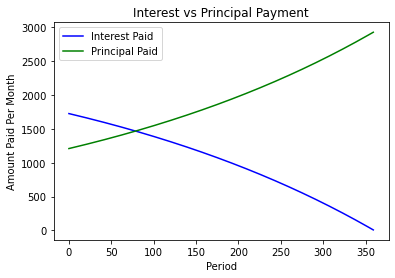

In [4]:
import matplotlib.pyplot as plt

# What is the price of the house you want to buy?
house_value = 1_000_000

# What is the down payment percentage ?
down_payment_percentage = 0.3

# What is the the down payment?
down_payment = house_value * down_payment_percentage

# What is the value of the mortgage loan required?
loan_amount = house_value - down_payment

# What is the mortgage loan tenure?
loan_tenure_year = 30

# How much does the annual percentage rate that bank quotes you for a 30-year fixed-rate mortgage loan?
annual_rate = 0.03 

# What is the the equivalent monthly mortgage rate from the annual percentage rate?
monthly_rate = ((1 + annual_rate) ** (1/12)) - 1

# How many monthly payment periods will there be over 30 years?
monthly_payment_periods = loan_tenure_year * 12 

# How much is the monthly mortgage payment?
# Note: multiply by -1 to make it positive
monthly_payment = npf.pmt(rate = monthly_rate, nper = monthly_payment_periods, pv = loan_amount) * -1

# Initiatize numpy arrays with mortgage_payment_periods number of elements of values 0
principal_remaining = np.zeros(monthly_payment_periods)
interest_paid = np.zeros(monthly_payment_periods)
principal_paid = np.zeros(monthly_payment_periods)

# Loop through each mortgage payment period
for i in range(0, monthly_payment_periods):
    
    # Handle the case for the first iteration
    if i == 0:
        previous_principal_remaining = loan_amount
    else:
        previous_principal_remaining = principal_remaining[i-1]
    
    # Calculate the interest based on the previous principal
    interest_payment = round(previous_principal_remaining * monthly_rate, 2)
    principal_payment = round(monthly_payment - interest_payment, 2)
    
    # Catch the case where all principal is paid off in the final period
    if previous_principal_remaining - principal_payment < 0:
        principal_payment = previous_principal_remaining
    
    # Collect the historical values
    interest_paid[i] = interest_payment
    principal_paid[i] = principal_payment
    principal_remaining[i] = previous_principal_remaining - principal_payment  
    
# Plot the interest vs principal
# Set plot color
plt.plot(interest_paid, color = 'Blue')
plt.plot(principal_paid, color = 'Green')

# Set legend, labels, and title
plt.legend(["Interest Paid", "Principal Paid"], loc = 2)
plt.xlabel("Period")
plt.ylabel("Amount Paid Per Month")
plt.title("Interest vs Principal Payment")
# Show plot
plt.show()

2 (b) You are comparing the different mortgage loans in the market. To save yourself time, write a function to automate loan amortization schedule of any fixed-rate mortgages given home value, down payment percentage, mortgage rate, and mortgage tenure.

In [5]:
# function to compare the NPVs of two projects given traditional cash flows
def loan_amortization(home_value, down_payment_percent, mortgage_rate, mortgage_tenure_year):

    ''' 
    INPUTS
    home_value: value of the home you are looking to buy
    down_payment_percent: the percentage you are paying up-front
    mortgage_tenure_year: the tenure of the mortgage loan (in years)
    mortgage_rate: bank quoted rate (Annual Percentage Rate) for the fixed-rate mortage loan for the specific mortgage tenure
    
    OUTPUTS
    A plot of interest and principal components for each monthly mortgage payment
    
    '''
    
    # Calculate the dollar value of the down payment
    down_payment = home_value * down_payment_percent
    
    # Calculate the value of the mortgage loan required
    loan_amount = home_value - down_payment
    
    # Calculate the equivalent monthly mortgage rate from the annual percentage rate
    monthly_rate = ((1 + mortgage_rate) ** (1/12)) - 1
    
    # Calculate monthly payment periods during the mortgage tenure (in years)?
    monthly_payment_periods = mortgage_tenure_year * 12 
    
    # Calculate the monthly mortgage payment
    # Note: multiply by -1 to make it positive
    monthly_payment = npf.pmt(rate = monthly_rate, nper = monthly_payment_periods, pv = loan_amount) * -1
    
    # Initiatize numpy arrays with mortgage_payment_periods number of elements of values 0
    principal_remaining = np.zeros(monthly_payment_periods)
    interest_paid = np.zeros(monthly_payment_periods)
    principal_paid = np.zeros(monthly_payment_periods)

    # Loop through each mortgage payment period
    for i in range(0, monthly_payment_periods):

        # Handle the case for the first iteration
        if i == 0:
            previous_principal_remaining = loan_amount
        else:
            previous_principal_remaining = principal_remaining[i-1]

        # Calculate the interest based on the previous principal
        interest_payment = round(previous_principal_remaining * monthly_rate, 2)
        principal_payment = round(monthly_payment - interest_payment, 2)

        # Catch the case where all principal is paid off in the final period
        if previous_principal_remaining - principal_payment < 0:
            principal_payment = previous_principal_remaining

        # Collect the historical values
        interest_paid[i] = interest_payment
        principal_paid[i] = principal_payment
        principal_remaining[i] = previous_principal_remaining - principal_payment  

    # Plot the interest vs principal
    # Set plot color
    plt.plot(interest_paid, color = 'Blue')
    plt.plot(principal_paid, color = 'Green')

    # Set legend, labels, and title
    plt.legend(["Interest Paid", "Principal Paid"], loc = 2)
    plt.xlabel("Period")
    plt.ylabel("Amount Paid Per Month")
    plt.title("Interest vs Principal Payment")
    # Show plot
    plt.show()

2 (c) You do not like the idea of having to pay more mortgage interest than its principal. Use the function to explore situations in which the principal component (of each monthly mortgage payment) is strictly higher than the interest component. <br><br>

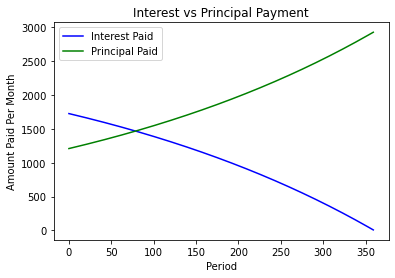

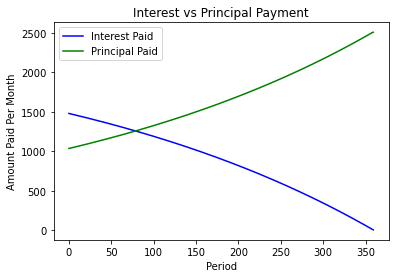

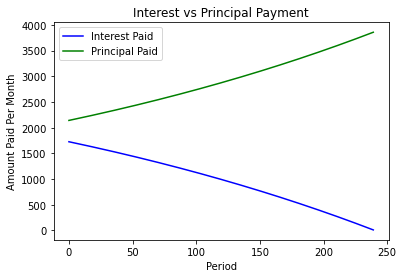

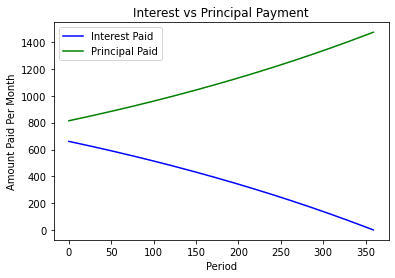

In [6]:
# Call the function
# benchmark
loan_amortization(home_value = 1_000_000, down_payment_percent = 0.3, mortgage_rate = 0.03, mortgage_tenure_year = 30)

# increase the down_payment by 1/3
loan_amortization(home_value = 1_000_000, down_payment_percent = 0.4, mortgage_rate = 0.03, mortgage_tenure_year = 30)

# cut mortgage tenure by 1/3
loan_amortization(home_value = 1_000_000, down_payment_percent = 0.3, mortgage_rate = 0.03, mortgage_tenure_year = 20)

# lower mortgage rate by 1/3
loan_amortization(home_value = 1_000_000, down_payment_percent = 0.6, mortgage_rate = 0.02, mortgage_tenure_year = 30)

### Question 3 - Negative House Equity?

### After you bought the house in Question 2, you now realize that you bought it at a bad time (i.e., housing market peak). You are expecting the price of the house to fall at the rate of 0.48% monthly over the mortgage period. As lenders in Singapore would demand full repayment when a house experiences negative equity (i.e., mortgage value is greater than the house value), you want to find out whether and when (if it does) the house will experience negative equity. 

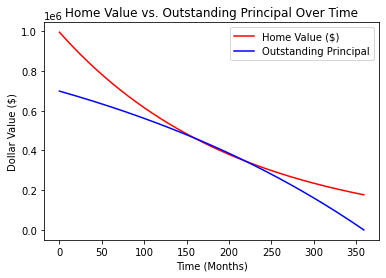

In [7]:
# Initiatize numpy array of monthly price changes with mortgage_payment_periods number of elements
# Prices fall by 0.2% monthly over the mortgage period
monthly_price_changes = [-0.0048] * monthly_payment_periods

# Calculate the cumulative growth over time
cumulative_decline_forecast = np.cumprod(1 + np.array(monthly_price_changes))

# Calculate the cumulative home equity (principal) over time
cumulative_home_equity = np.cumsum(principal_paid)

# Calculate your percentage home equity over time
cumulative_percent_owned = down_payment_percentage + (cumulative_home_equity / house_value)

# Forecast the home value over time
home_value_forecast = cumulative_decline_forecast * house_value

# Forecast the home equity value owned over time
cumulative_home_value_owned = home_value_forecast * cumulative_percent_owned

# Find all periods where your mortgage equity turns negative
underwater = home_value_forecast < (loan_amount - cumulative_home_equity)

# Plot the home value vs principal remaining
# Set plot color
plt.plot(home_value_forecast, color = 'red')
plt.plot(loan_amount - cumulative_home_equity, color = 'blue')

# Set legend, labels, and title
plt.legend(["Home Value ($)", "Outstanding Principal"])
plt.ylabel('Dollar Value ($)')
plt.xlabel('Time (Months)')
plt.title('Home Value vs. Outstanding Principal Over Time')

# Show plot
plt.show()

In [8]:
# Show the months the house equity turns negative
underwater_months = np.where(home_value_forecast < (loan_amount - cumulative_home_equity))
print(underwater_months)

(array([160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
       186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
       199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,
       212, 213, 214, 215, 216, 217, 218, 219]),)
